In [66]:
import pandas as pd

In [67]:
df = pd.read_excel('data.xlsx')

In [68]:
df.head()

,"Tipo de cambio, información histórica",Unnamed: 1
0,NaN,NaN
1,Periodo,1.Tipo de Cambio (pesos por dólar)
2,1970-01-01 00:00:00,0.010117
3,1970-02-01 00:00:00,0.010388
4,1970-03-01 00:00:00,0.010772


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Tipo de cambio, información histórica  660 non-null    object
 1   Unnamed: 1                             660 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [70]:
df = df.iloc[2::]
df.head()

,"Tipo de cambio, información histórica",Unnamed: 1
2,1970-01-01 00:00:00,0.010117
3,1970-02-01 00:00:00,0.010388
4,1970-03-01 00:00:00,0.010772
5,1970-04-01 00:00:00,0.011119
6,1970-05-01 00:00:00,0.011431


In [71]:
og_columns = df.columns
og_columns

Index(['Tipo de cambio, información histórica', 'Unnamed: 1'], dtype='object')

In [72]:
df = df.rename(columns={og_columns[0]: 'periodo', og_columns[1]: 'pesos por dolar'})

In [73]:
df['pesos por dolar'] = pd.to_numeric(df['pesos por dolar'])
df['periodo'] = pd.to_datetime(df['periodo'])  # <-- omit if datetime_utc is already datetime64[ns]
df[['year', 'month', 'day']] = df['periodo'].apply(lambda x: x.timetuple()[:3]).tolist()


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 2 to 660
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   periodo          659 non-null    datetime64[ns]
 1   pesos por dolar  659 non-null    float64       
 2   year             659 non-null    int64         
 3   month            659 non-null    int64         
 4   day              659 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 25.9 KB


In [75]:
df = df.drop('periodo', axis=1)
df

,pesos por dolar,year,month,day
2,0.010117,1970,1,1
3,0.010388,1970,2,1
4,0.010772,1970,3,1
5,0.011119,1970,4,1
6,0.011431,1970,5,1
...,...,...,...,...
656,937.560909,2024,7,1
657,929.895238,2024,8,1
658,926.214444,2024,9,1
659,933.812273,2024,10,1


In [76]:
column_to_move = df.pop('pesos por dolar')
df.insert(og_columns.size+1, 'usd_to_clp', column_to_move)
df.head()

,year,month,day,usd_to_clp
2,1970,1,1,0.010117
3,1970,2,1,0.010388
4,1970,3,1,0.010772
5,1970,4,1,0.011119
6,1970,5,1,0.011431


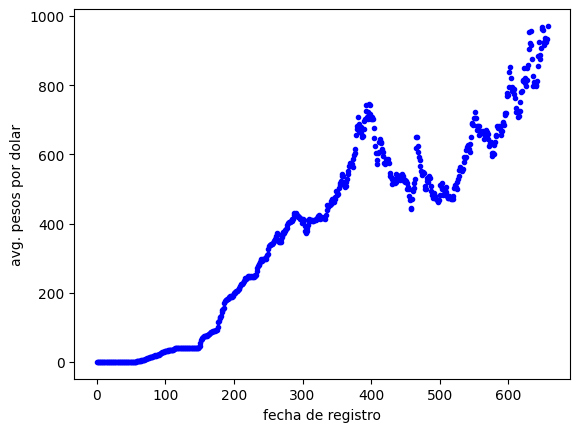

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(range(0, df.shape[0])), df['usd_to_clp'], ".b")
plt.xlabel("fecha de registro")
plt.ylabel("avg. pesos por dolar")
plt.show()